In [60]:
from prophet import Prophet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("municipality_bus_utilization.csv")

In [62]:
df.head()

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019


In [63]:
df.tail()

,timestamp,municipality_id,usage,total_capacity
13065,2017-08-19 16:30:35,2,548,697
13066,2017-08-19 16:30:35,8,1193,2947
13067,2017-08-19 16:30:35,7,1354,2019
13068,2017-08-19 16:30:35,6,1680,3113
13069,2017-08-19 16:30:35,3,1189,1930


In [64]:
df.dtypes

timestamp          object
municipality_id     int64
usage               int64
total_capacity      int64
dtype: object

In [65]:
df.columns

Index(['timestamp', 'municipality_id', 'usage', 'total_capacity'], dtype='object')

In [66]:
df.drop(["municipality_id","total_capacity"],axis=1,inplace=True)

In [67]:
df.head()

,timestamp,usage
0,2017-06-04 07:59:42,454
1,2017-06-04 07:59:42,556
2,2017-06-04 07:59:42,1090
3,2017-06-04 07:59:42,204
4,2017-06-04 07:59:42,718


In [68]:
df.columns=["ds","y"]

In [69]:
df['ds'] = pd.to_datetime(df["ds"])

In [70]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [72]:
m = Prophet(interval_width=0.95,daily_seasonality=True)
model=m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [73]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast=m.predict(future)

In [74]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-06-04 07:59:42,637.761416,-613.325337,1692.733008,637.761416,637.761416,-117.199270,-117.199270,-117.199270,-223.383003,-223.383003,-223.383003,106.183733,106.183733,106.183733,0.0,0.0,0.0,520.562146
1,2017-06-04 08:25:42,637.751516,-628.478059,1820.860266,637.751516,637.751516,-44.810389,-44.810389,-44.810389,-151.175576,-151.175576,-151.175576,106.365187,106.365187,106.365187,0.0,0.0,0.0,592.941128
2,2017-06-04 08:59:42,637.738571,-577.998983,2009.062806,637.738571,637.738571,60.305986,60.305986,60.305986,-46.274362,-46.274362,-46.274362,106.580348,106.580348,106.580348,0.0,0.0,0.0,698.044556
3,2017-06-04 09:32:46,637.725981,-490.086723,2056.608230,637.725981,637.725981,161.161722,161.161722,161.161722,54.394338,54.394338,54.394338,106.767384,106.767384,106.767384,0.0,0.0,0.0,798.887703
4,2017-06-04 09:59:48,637.715688,-389.329476,2059.120007,637.715688,637.715688,235.026478,235.026478,235.026478,128.121146,128.121146,128.121146,106.905333,106.905333,106.905333,0.0,0.0,0.0,872.742166


In [75]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1404,2017-11-23 16:30:35,984.920132,-459.940695,2318.879640,725.438287,1250.857355,-24.257338,-24.257338,-24.257338,169.890305,169.890305,169.890305,-194.147643,-194.147643,-194.147643,0.0,0.0,0.0,960.662793
1405,2017-11-24 16:30:35,987.187095,-84.531902,2433.659664,725.194121,1257.483438,96.784761,96.784761,96.784761,169.890305,169.890305,169.890305,-73.105544,-73.105544,-73.105544,0.0,0.0,0.0,1083.971856
1406,2017-11-25 16:30:35,989.454058,-24.850126,2535.117845,725.062577,1264.266396,251.014771,251.014771,251.014771,169.890305,169.890305,169.890305,81.124466,81.124466,81.124466,0.0,0.0,0.0,1240.468829
1407,2017-11-26 16:30:35,991.721022,5.977027,2593.018207,725.056890,1271.547329,277.823835,277.823835,277.823835,169.890305,169.890305,169.890305,107.933530,107.933530,107.933530,0.0,0.0,0.0,1269.544857
1408,2017-11-27 16:30:35,993.987985,-21.089600,2557.099883,723.868864,1278.341023,275.902830,275.902830,275.902830,169.890305,169.890305,169.890305,106.012525,106.012525,106.012525,0.0,0.0,0.0,1269.890816


In [76]:
print(forecast[['ds','yhat',"yhat_lower","yhat_upper"]].head())

                   ds        yhat  yhat_lower   yhat_upper
0 2017-06-04 07:59:42  520.562146 -613.325337  1692.733008
1 2017-06-04 08:25:42  592.941128 -628.478059  1820.860266
2 2017-06-04 08:59:42  698.044556 -577.998983  2009.062806
3 2017-06-04 09:32:46  798.887703 -490.086723  2056.608230
4 2017-06-04 09:59:48  872.742166 -389.329476  2059.120007


In [77]:
print(forecast[['ds','yhat',"yhat_lower","yhat_upper"]].tail())

                      ds         yhat  yhat_lower   yhat_upper
1404 2017-11-23 16:30:35   960.662793 -459.940695  2318.879640
1405 2017-11-24 16:30:35  1083.971856  -84.531902  2433.659664
1406 2017-11-25 16:30:35  1240.468829  -24.850126  2535.117845
1407 2017-11-26 16:30:35  1269.544857    5.977027  2593.018207
1408 2017-11-27 16:30:35  1269.890816  -21.089600  2557.099883


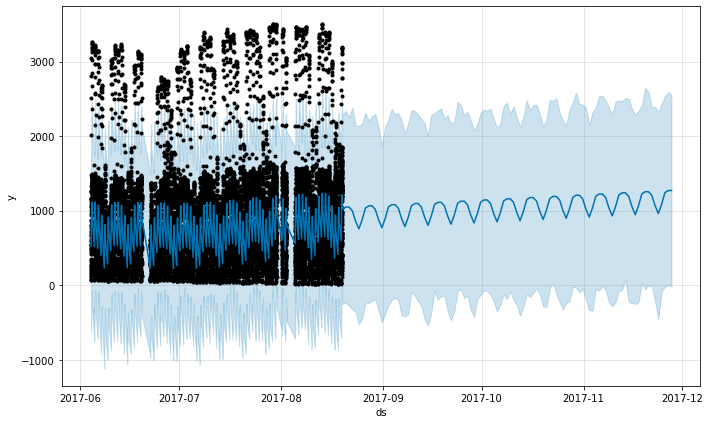

In [78]:
m.plot(forecast)
plt.show()

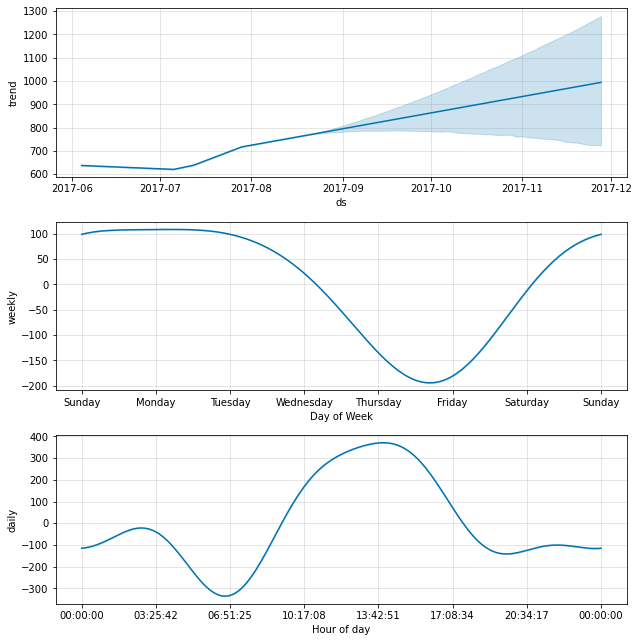

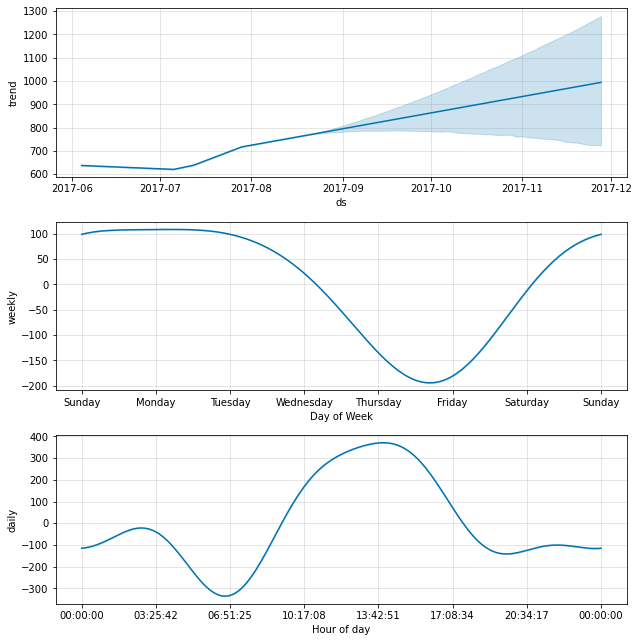

In [79]:
m.plot_components(forecast)